# CP213: Tutorial Notebook S2 Week 9
This tutorial builds on previous tutorials and you should make sure you understand the relevant solutions prior to beginning this tutorial.

## Question 1

Consider the salt tank recycle question from tutorial 7, the question for which is repeated here:

Consider two continuously-stirred tanks filled with brine solutions connected with flows feeding into one another.

<img src="https://github.com/mjksill/CP213-online/blob/master/tutorials/tank-recycle.png?raw=1" width="300">

The first tank is charged with $40 \ \rm{L}$ water and $5\ \rm{kg}$ salt and the second with $20\ \rm{L}$ water and $4\ \rm{kg}$ salt. The flowrates into each of the tanks from the other are equivelant at $10\ \rm{L\ min^{-1}}$. Let $x_1$ and $x_2$ be the mass of salt in tanks 1 and 2, respectively, at anytime $t$.  

Solve the system of differential equations and plot the mass of the tanks with time. If you are uncomfortable with working on python to plot, you can make use of other software that you prefer (e.g. Excel, Matlab etc.). What happens to the mass of salt in each tank as the system approaches equillibrium?

-x_1(t)/4 + x_2(t)/2

x_1(t)/4 - x_2(t)/2

Eq(x_1(t), 6 - exp(-3*t/4))

Eq(x_2(t), 3 + exp(-3*t/4))

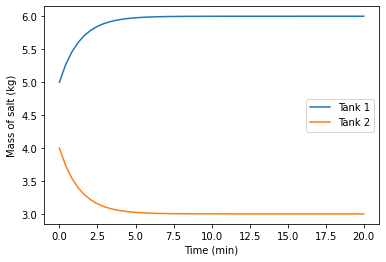

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
t = sp.symbols('t')
x1 = sp.Function('x_1')(t)
x2 = sp.Function('x_2')(t)
flowrate1,flowrate2 = 10,10
volume1, volume2 = 40,20
concentration1, concentration2 = x1/volume1 , x2/volume2
massflowrate1, massflowrate2 = concentration1*flowrate1,concentration2*flowrate2
massratetank1, massratetank2 = massflowrate2-massflowrate1, massflowrate1-massflowrate2
display(massratetank1,massratetank2)
ics = {x1.subs(t, 0): 5, x2.subs(t, 0): 4}

sol = sp.dsolve([massratetank1 - x1.diff(t), massratetank2 - x2.diff(t)], [x1, x2] , ics=ics)
display(sol[0],sol[1])
time = np.linspace(0, 20, 50)

x1_values = [sol[0].rhs.subs(t, ti) for ti in time]
x2_values = [sol[1].rhs.subs(t, ti) for ti in time]

plt.plot(time, x1_values, label='Tank 1')
plt.plot(time, x2_values, label='Tank 2')
plt.xlabel('Time (min)')
plt.ylabel('Mass of salt (kg)')
plt.legend()
plt.show()


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
t = sp.symbols('t')
x1 = sp.Function('x_1')(t)
x2 = sp.Function('x_2')(t)
flowrate1,flowrate2 = 10,10
volume1, volume2 = 40,20
concentration1, concentration2 = x1/volume1 , x2/volume2
massflowrate1, massflowrate2 = concentration1*flowrate1,concentration2*flowrate2
massratetank1, massratetank2 = massflowrate2-massflowrate1, massflowrate1-massflowrate2
display(massratetank1,massratetank2)

-x_1(t)/4 + x_2(t)/2

x_1(t)/4 - x_2(t)/2

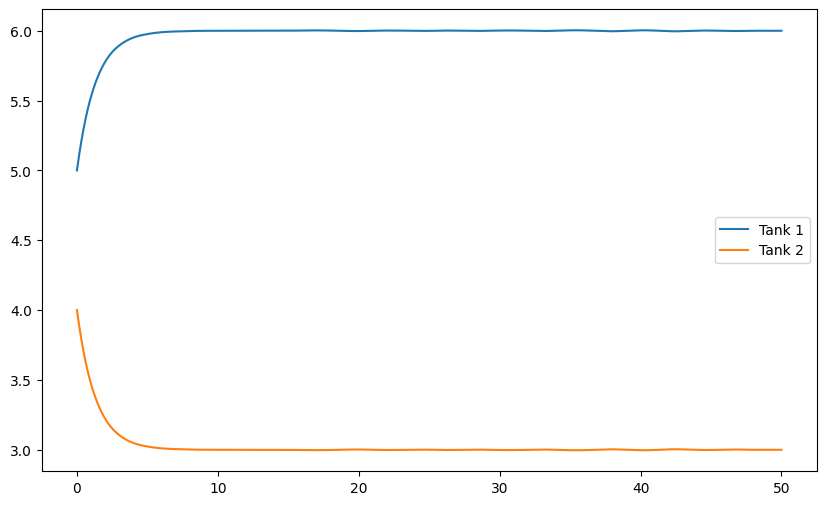

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A = np.array([[-0.25, 0.5], [0.25, -0.5]])

def dTdt(t, x, A):
    dxdt = A @ x  # Matrix multiplication using the '@' operator
    return dxdt

t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)
ics = [5, 4]

sol1 = solve_ivp(dTdt, t_span, ics, args=(A,), t_eval=t_eval)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t_eval, sol1.y[0], label="Tank 1")
ax.plot(t_eval, sol1.y[1], label="Tank 2")
ax.legend()

plt.show()



## Question 2

Consider a system of $N$ tanks that are connected in series, as shown
in the figure below.  Each tank initially contains $V=1\,{\rm m}^3$ of
water, which is fully mixed, and has two inlet streams and two outlet
streams.  Water at temperature $T_{R, {\rm in}}$ enters tank 1 at a
volumetric flow rate $\dot{V}_{R,{\rm in}}$, and water at temperature
$T_{L, {\rm in}}$ enters tank 1 at a volumetric flow rate
$\dot{V}_{L,{\rm in}}$.

<img src="https://github.com/mjksill/CP213-online/blob/master/tutorials/tank-series.png?raw=1" width="800">

For the questions below, you can consider that the flows are such that
the liquid volume in each of the tanks remains constant.  Assume that water has a density $\rho=1000\,{\rm kg\, m^{-3}}$ and heat capacity
$C=4.2\,{\rm kJ\,kg}^{-1}$.

Note that for each of the matrices the set of differential equations that need to be solved can be written 
in matrix form as
\begin{align*}
\frac{d}{dt} {\bf T} &= {\bf A}\cdot{\bf T} + {\bf b}
.
\end{align*}

This is a system of inhomogenous differential equations. This follows a similar procedure to solve homogenous differential equations, with the addition that the inhomogenous ${\bf b}$ term must be multiplied by ${\bf P}^{-1}$ too.

1. Consider the case where $\dot{V}_{R,{\rm in}}=\dot{V}_{R,{\rm out}}=0.1\,{\rm m^3\,s^{-1}}$, $\dot{V}_{L,{\rm in}}=\dot{V}_{L,{\rm out}}=0$, $\dot{v}_R=0.2\,{\rm m^3\,s^{-1}}$, $T_{R,{\rm in}}=80^\circ{\rm C}$, and $\dot{v}_L=0.1\,{\rm m^3\,s^{-1}}$.  In the case of 3 tanks, if the initial temperature of tank 2 is $80^\circ{\rm C}$ and the initial temperature of the other tanks is $10^\circ{\rm C}$, solve the differential equations and plot the variation of the temperature of each tank with time.

2. Consider the case where $\dot{V}_{R,{\rm in}}=\dot{V}_{L,{\rm in}}=\dot{V}_{R,{\rm out}}=\dot{V}_{L,{\rm out}}=0.1\,{\rm m^3\,s^{-1}}$, $\dot{v}_R=\dot{v}_L=0.1\,{\rm m^3\,s^{-1}}$, $T_{R,{\rm in}}=80^\circ{\rm C}$, and $T_{L,{\rm in}}=10^\circ{\rm C}$.  In the case of 3 tanks, if the initial temperature of the water in all of the tanks is $60^\circ{\rm C}$, solve the differential equations and plot the variation of the temperature of each tank with time.

3. Consider the case where $\dot{V}_{R,{\rm in}}=\dot{V}_{L,{\rm in}}=\dot{V}_{R,{\rm out}}=\dot{V}_{L,{\rm out}}=0$ and $\dot{v}_R=\dot{v}_L=0.1\,{\rm m^3\,s^{-1}}$.  In the case of 3 tanks, if the initial temperature of tank 2 is $80^\circ{\rm C}$ and the initial temperature of the other tanks is $10^\circ{\rm C}$,  solve the differential equations and plot the variation of the temperature of each tank with time. 


In [13]:
import sympy as sp
t = sp.symbols('t',real=True)
T1,T2,T3,T4,T5=sp.Function('T_1')(t),sp.Function('T_2')(t),sp.Function('T_3')(t),sp.Function('T_4')(t),sp.Function('T_5')(t)
VrateRin,VrateLin,VrateR,VrateL= 0.1,0.1,0.1,0.1
TRwaterin = 80
rho=1000
c=4.2
tank1 = sp.Eq(T1.diff(),c*rho*VrateRin*(TRwaterin - T1) - c*rho*VrateR*(T1 - T2) + c*rho*VrateL*(T1 - T2))
tank2 = sp.Eq(T2.diff(),c*rho*VrateR*(T1-T2)+c*rho*VrateR*(T2-T3)-c*rho*VrateL*(T1-T2)-c*rho*VrateL*(T2-T3))
tank3 = sp.Eq(T3.diff(),c*rho*VrateR*(T2-T3)+c*rho*VrateR*(T3-T4)-c*rho*VrateL*(T3-T2)-c*rho*VrateL*(T3-T4))
tank4 = sp.Eq(T4.diff(),c*rho*VrateR*(T3-T4)+c*rho*VrateR*(T4-T5)-c*rho*VrateL*(T3-T4)-c*rho*VrateL*(T4-T5))
tank5 = sp.Eq(T5.diff(),c*rho*VrateR*(T4 - T5) - c*rho*VrateL*(T4 - T5)+c*rho*VrateLin*(T5-10))
system=[tank1,tank2,tank3,tank4,tank5]
ics={T1.subs(t,0):60,T2.subs(t,0):60,T3.subs(t,0):60,T4.subs(t,0):60,T5.subs(t,0):60}
sol=sp.dsolve(system,[T1,T2,T3,T4,T5])
display(sol)




[Eq(T_1(t), 1.0*C1*exp(-420.0*t) + 80.0),
 Eq(T_2(t), 1.0*C2),
 Eq(T_3(t), 1.0*C2 + 1.0*C3*exp(-840.0*t)),
 Eq(T_4(t), 1.0*C4),
 Eq(T_5(t), 1.0*C5*exp(420.0*t) + 10.0)]

[]

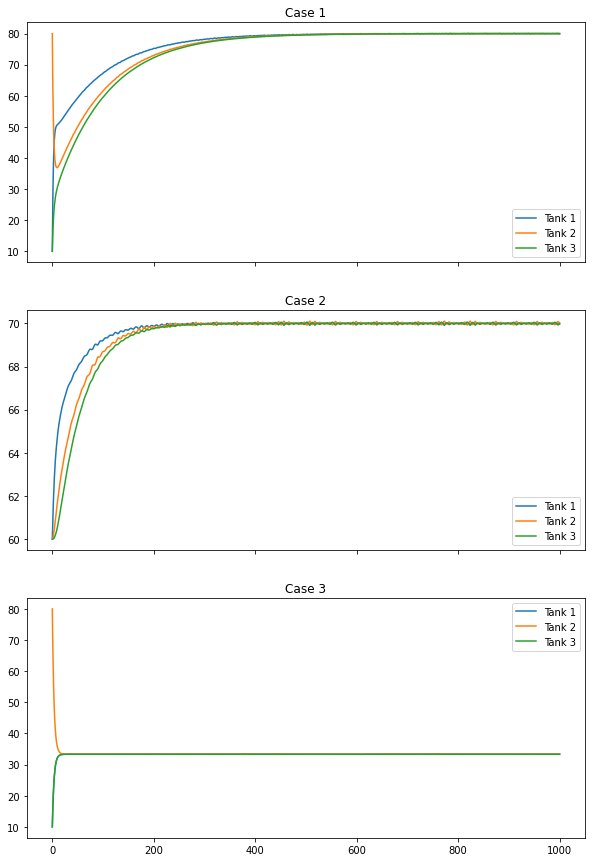

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def dTdt(t, T, A, b):
    return A @ T + b

# Constants
rho = 1000  # kg/m^3
C = 4.2  # kJ/kg
V = 1  # m^3

# Case 1
A1 = np.array([[-0.3, 0.2, 0], [0.1, -0.3, 0.2], [0, 0.1, -0.1]])
b1 = np.array([0.1 * 80, 0, 0])
initial_conditions1 = [10, 80, 10]

# Case 2
A2 = np.array([[-0.2, 0.1, 0], [0.1, -0.2, 0.1], [0, 0.1, -0.1]])
b2 = np.array([0.1 * 70, 0, 0])
initial_conditions2 = [60, 60, 60]

# Case 3
A3 = np.array([[-0.1, 0.1, 0], [0.1, -0.2, 0.1], [0, 0.1, -0.1]])
b3 = np.array([0, 0, 0])
initial_conditions3 = [10, 80, 10]

# Time span
t_span = (0, 1000)
t_eval = np.linspace(*t_span, 1000)

# Solve ODEs
sol1 = solve_ivp(dTdt, t_span, initial_conditions1, args=(A1, b1), t_eval=t_eval)
sol2 = solve_ivp(dTdt, t_span, initial_conditions2, args=(A2, b2), t_eval=t_eval)
sol3 = solve_ivp(dTdt, t_span, initial_conditions3, args=(A3, b3), t_eval=t_eval)

# Plot results
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

axs[0].plot(t_eval, sol1.y[0], label="Tank 1")
axs[0].plot(t_eval, sol1.y[1], label="Tank 2")
axs[0].plot(t_eval, sol1.y[2], label="Tank 3")
axs[0].set_title("Case 1")
axs[0].legend()

axs[1].plot(t_eval, sol2.y[0], label="Tank 1")
axs[1].plot(t_eval, sol2.y[1], label="Tank 2")
axs[1].plot(t_eval, sol2.y[2], label="Tank 3")
axs[1].set_title("Case 2")
axs[1].legend()

axs[2].plot(t_eval, sol3.y[0], label="Tank 1")
axs[2].plot(t_eval, sol3.y[1], label="Tank 2")
axs[2].plot(t_eval, sol3.y[2], label="Tank 3")
axs[2].set_title("Case 3")
axs[2].legend()
plt.plot()
